# Veri Analiz Keşfi

Veri Keşfi, verilerin istatistiksel ve görselleştirme teknikleriyle tanımlanmasıyla ilgilidir. Daha ileri analizler için bu verilerin önemli yönlerini odaklamak amacıyla verileri araştırıyoruz.

## Univarite Analysis (Tek Değişken Analizi)

Tek değişken analizi(nitelikleri) tek tek araştırır. Değişkenler kategorik ve sayısal olabilir. Birbirlerine dönüştürülebilirler.

* Sayısal  ---> Kategorik : binning and discretization
    
* Kategorik ---> Sayısal : encoding

Kategorik değişkenler - Norminal - sıralama yok (kadın/erkek gibi)
                        
                  - Ordinal  - sıralama var (lise/üniversite gibi)

| Statistics | Visualization |
| --- | --- |
| Count | Bar Chart |
| Count% | Pie Chart |

Sayısal değişkenler (sürekli değişkenler) - Aralık- farklılıkları yorumlanabilir değerlere sahiptir. Ancak gerçek bir sıfır içermez.
                               
                               - Oran- gerçek sıfır içerbilir ve aritmetik işlemler anlamlıdır.

| Statistics | Visualization |
| --- | --- |
| Count | Histogram |
| Min,Max | Box plot |
| Mean | Box plot |
| Median | Box plot |
| Mode | Histogram |
| Quantile | Box plot |
| Range | Box plot |
| Varyans | Histogram |
| Standart Sapma | Histogram |
| Sapma Katsayısı | Histogram |
| Skewness | Histogram |
| Kurtosis | Histogram |

### Uygulama

In [7]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [12]:
# tip niteliğinin 1. çeyreği ve 3.çeyreği
df_tip = df['tip']
Q1 = df_tip.quantile(0.25)
Q3 = df_tip.quantile(0.75)

In [13]:
Q1

2.0

In [14]:
Q3

3.5624999999999996

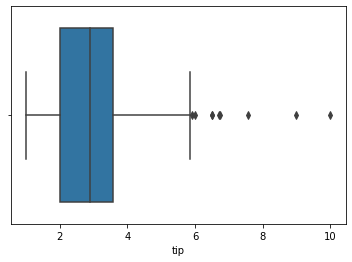

In [16]:
# tip değişkenin box plot
sns.boxplot(x=df_tip);

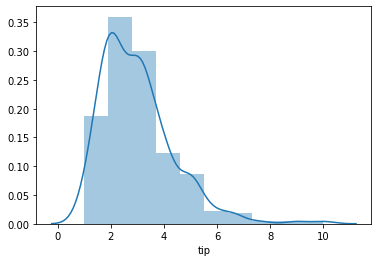

In [20]:
# histogram
sns.distplot(df_tip, bins = 10, kde = True);

Skewness: Çarpıklık olasılık kuramı ve istatistik bilim dallarında bir reel-değerli rassal değişkenin olasılık dağılımının simetrik olamayışının ölçülmesidir.

Kurtosis: Olasılık kuramı ve bir dereceye kadar istatistik bilim dallarında basıklık kavramıdır.

In [24]:
import scipy.stats
scipy.stats.skew(df_tip, axis=0, bias=True)

1.4564266884221506

In [26]:
scipy.stats.kurtosis(df_tip, axis=0, bias=True)

3.5495519893455114

In [32]:
# range = max-min
range = df_tip.max()-df_tip.min()
range

9.0

In [33]:
# varyans
import numpy as np
np.var(df_tip)

1.9066085124966428

## Bivarite Analysis (İki değişken analizi)

İki değişken analizi, iki değişkenin eş zamnalı analizidir. İki değilken arasıdaki ilişkinin kavramını, bir ilişki olup olmadığını ve bu ilişkinin gücünü veya iki değişken arasında fark olup olmadığını ve farklılıkların önemini araştırır. 

### Sayısal-Sayısal

#### Dağılım grafiği

İki sayısal değişken arasındaki ilişkinin yararlı bir görsel temsilidir ve genellikle doğrusal bir kolerasyon çalışmadan veya bir regresyon çizgisine fit etmeden önce çizilir. Ortaya çıkan desen, iki değişken arasındaki ilişkinin türünü(doğrusal ve doğrusal olmayan) ve gücünü gösterir. İki boyutlu bir dağılım grafiğine daha fazla bilgi eklenebilir. Bir veri kümesinde birçok değişkenle ilgileniliyorsa bir kerede iki değişkenin tüm olası dağılım grafiklerini sunmanın bir yolu dağılım grafiği matrisidir.

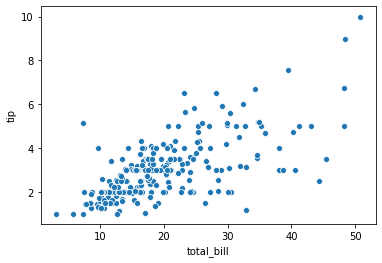

In [35]:
sns.scatterplot(x='total_bill',y='tip',data=df);

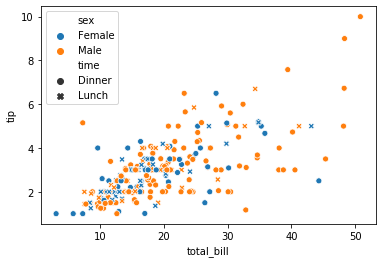

In [36]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',style='time',data=df);

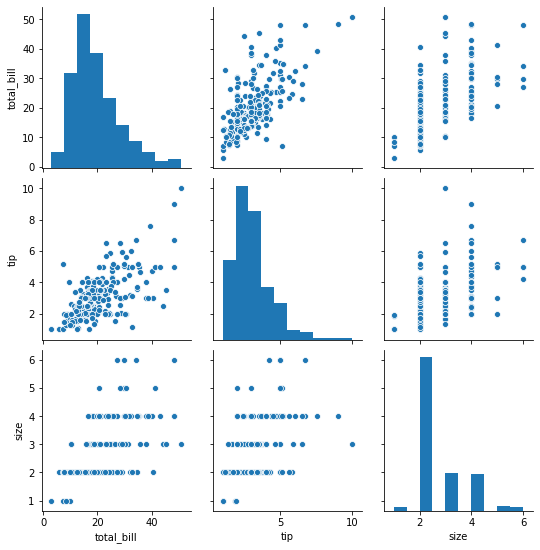

In [38]:
sns.pairplot(df);

#### Lineer Kolerasyon

Doğrusal kolerasyon, iki sayısal değişken arasındaki doğrusal ilişkinin gücünü ölçmektedir. İki değişken arasındaki kolerasyon olmadığında, bir miktardaki değerlerin, ikinci miktarın değeleriyle artma veya azalma eğilimi yoktur.

Lineer kolerasyon sadece doğrusal bir ilişkinin gücünü ölçer ve her zaman -1 ile 1 arasındadır. -1 mükemmel negatif doğrusal kolerasyon anlamına ve +1 mükemmel pozitif doğrusal kolerasyon anlamına gelir ve sıfır lineer kolerasyonun olmadığı anlamına gelir.

In [42]:
np.cov(df_tip,df['total_bill'])

array([[ 1.91445464,  8.32350163],
       [ 8.32350163, 79.25293861]])

### Kategorik-Kategorik

#### Yığılmış Sutün Grafik (Stacked Column Cart)

İki kategorik değişken arasındaki ilişkiyi görselleştirmek için yararlı bir grafiktir. Bir değişkenin her kategorisinin, ikinci değişkenin kategorilerinin toplamına katıkısı yüzdesini karşılaştırır.

Text(0, 0.5, 'y')

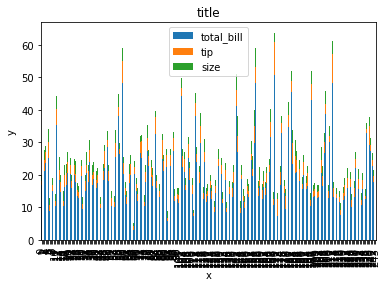

In [45]:
from matplotlib import pyplot as plt
df.plot(kind='bar', stacked=True)
plt.title("title")
plt.xlabel("x")
plt.ylabel("y")

#### Ki-kare testi (Chi-square)

Kategorik değişkenler arasındaki ilişkiyi belirlemek için kullanılır. Frekans tablosunda bir veya daha fazla kategoride beklenen frekanslar (c) ile gözlemlenen frekansları (n) arasındaki farka dayanır. Ki-kare dağılımı, hesaplanan ki-kare için bir olasılık ve serbestlik derecesi döndürür. Sıfır olasılığı, iki kategorik değişken arasında tam bir bağımlılık gösterir ve bir olasılık, iki kategorik değişkenin tamemen bağımsız olduğu anlamına gelir. Tchouproff Durumsallık Katsayısı, ikii kategorik değişkne arasındaki bağımlılık miktarını ölçer.

In [46]:
scipy.stats.chisquare(df_tip, f_exp=None, ddof=0, axis=0)

Power_divergenceResult(statistic=155.15985182755134, pvalue=0.9999975604014554)

#### Kategorik-Sayısal

* Line Chart with Error Bars

* Combination Chart

#### Z-testi ve t-testi

Temelde aynıdır. İki grubun ortalamalarının istatistiksel olasılık birbirinden farklı olup olmadığını değerlendirirler. Bu analiz, kategorik bir değişkenin ikiden fazla kategorisi için bir sayısal değişkenin ortalamalarını karşılaştırmak için uygundur.

#### ANOVA (Varyans Analizi)

İkiden fazla grubun ortalamasının istatistiksel olarak birbirinden farklı olup olmadığını değerlendirir. Bu analiz kategorik bir değişkenin ikiden fazla kategorisi için bir sayısal değişkenin ortalamalarını karşılaştırmak için uygundur.